In [689]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [690]:
data = pd.read_csv('/content/train_v9rqX0R.csv')

### EXPLORATORY DATA ANALYSIS (EDA):

In [691]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [692]:
data.shape

(8523, 12)

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [694]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### DATA VISUALIZATION

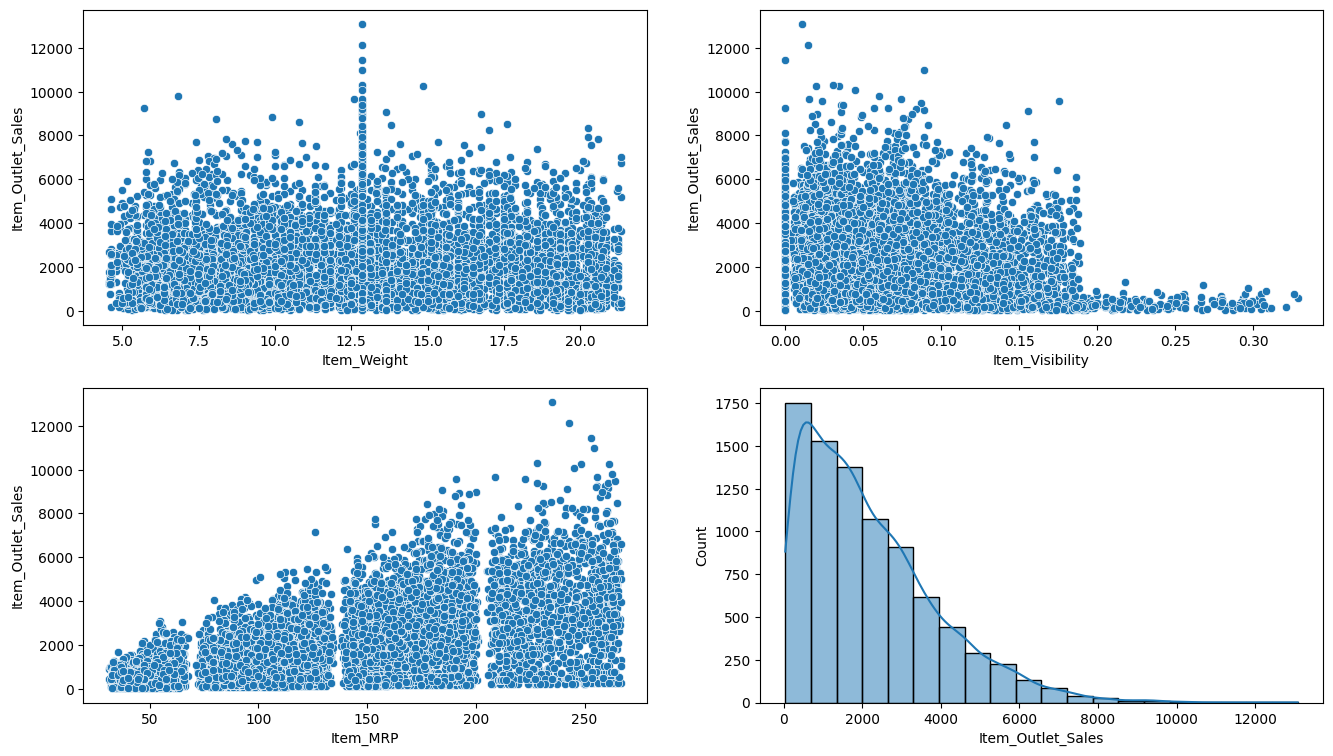

In [743]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales' ,data=data, ax=axes[0, 0])
sns.scatterplot( x= "Item_Visibility", y='Item_Outlet_Sales', data=data, ax=axes[0, 1])
sns.scatterplot( x= "Item_MRP", y='Item_Outlet_Sales', data=data, ax=axes[1, 0])
sns.histplot( x= "Item_Outlet_Sales", data=data, ax=axes[1, 1], bins=20, kde=True)
plt.show()

### DATA PREPOCESSING: TRAIN DATA SET

#### Handling Missing Data:

In [696]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [697]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [698]:
# Handle missing values in 'Item_Weight' and 'Outlet_Size'
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

#### Encoding Categorical Variables:



In [699]:
data['Item_Identifier'].str[:2].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [700]:
# Extract the first two characters from 'Item_Identifier' to create 'Item_Category'
data['Item_Category'] = data['Item_Identifier'].str[:2]

In [701]:
# Perform one-hot encoding for 'Item_Category'
data = pd.get_dummies(data, columns=['Item_Category'], prefix='Category')

In [702]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

***Here we have different variations for similar categories like 'Low Fat', 'LF', 'low fat' fo Low fat category and 'reg', 'Regular' for regular category. So we can standardise them.***

In [703]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.title()  # Convert to lowercase
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Lf', 'Low Fat'], 'Low_Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('Reg', 'Regular')

In [704]:
data['Item_Fat_Content'].value_counts()

Low_Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [705]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Item_Fat_Content'], prefix='Fat_Content')

In [706]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category_DR,Category_FD,Category_NC,Fat_Content_Low_Fat,Fat_Content_Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,1,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,0,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0,1,0,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,1,1,0


### FEATURE SELECTION, TRAIN TEST SPLIT

In [707]:
from sklearn.model_selection import train_test_split
x = data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'\
          , 'Fat_Content_Low_Fat','Fat_Content_Regular'\
          , 'Category_DR', 'Category_FD', 'Category_NC'\
          ]]
y = data['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

###TRAINING THE MODEL

##### Linear Regression

In [708]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [709]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, y_pred)

In [710]:
lr_mse

1792969.7158242054

In [711]:
r2_score(y_test, y_pred)

0.3403276445733413

### PREPROCESSING OF TEST DATASET

#### EDA

In [712]:
test_data = pd.read_csv('/content/test_AbJTz2l.csv')

In [713]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [714]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [715]:
test_data.shape

(5681, 11)

In [716]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<Axes: xlabel='Item_MRP', ylabel='Count'>

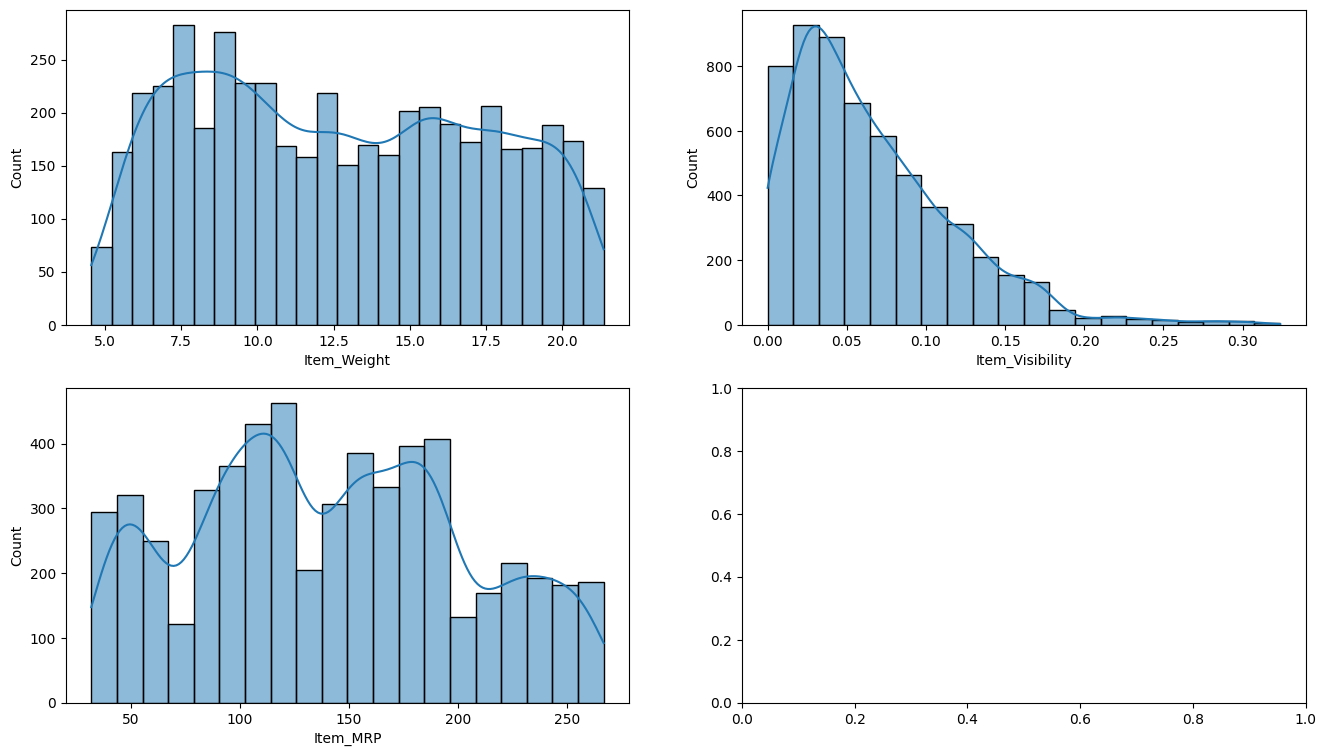

In [717]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(x='Item_Weight', data=test_data, ax=axes[0, 0], bins=25, kde=True)
sns.histplot( x= "Item_Visibility", data=test_data, ax=axes[0, 1], bins=20, kde=True)
sns.histplot( x= "Item_MRP", data=test_data, ax=axes[1, 0], bins=20, kde=True)

#### Handling Missing Data:

In [718]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [719]:
# Handle missing values in 'Item_Weight' and 'Outlet_Size'
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

#### Encoding Categorical Variables:



In [720]:
test_data['Item_Identifier'].str[:2].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64

In [721]:
# Extract the first two characters from 'Item_Identifier' to create 'Item_Category'
test_data['Item_Category'] = test_data['Item_Identifier'].str[:2]

In [722]:
# Perform one-hot encoding for 'Item_Category'
test_data = pd.get_dummies(test_data, columns=['Item_Category'], prefix='Category')

In [723]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

***Here we have different variations for similar categories like 'Low Fat', 'LF', 'low fat' fo Low fat category and 'reg', 'Regular' for regular category. So we can standardise them.***

In [724]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.title()
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['Lf', 'Low Fat'], 'Low_Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('Reg', 'Regular')

In [725]:
test_data['Item_Fat_Content'].value_counts()

Low_Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [726]:
# Perform one-hot encoding
test_data = pd.get_dummies(test_data, columns=['Item_Fat_Content'], prefix='Fat_Content')

### FEATURE SELECTION

In [727]:
X_TEST = test_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'\
                    ,'Fat_Content_Low_Fat','Fat_Content_Regular'\
                    , 'Category_DR', 'Category_FD', 'Category_NC'\
                    ]]

### PREDICTION OF 'Item_Outlet_Sales'

In [728]:
Y_PRED_TEST = lr_model.predict(X_TEST)

In [729]:
threshold = 0  # Set the threshold value
Y_PRED_TEST[Y_PRED_TEST < threshold] = threshold

In [730]:
predicted_data = pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [731]:
predicted_data['Item_Outlet_Sales'] = Y_PRED_TEST

In [732]:
predicted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    5681 non-null   object 
 1   Outlet_Identifier  5681 non-null   object 
 2   Item_Outlet_Sales  5681 non-null   float64
dtypes: float64(1), object(2)
memory usage: 133.3+ KB


In [733]:
predicted_data.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1912.642471
1,FDW14,OUT017,1416.862646
2,NCN55,OUT010,3517.910923
3,FDQ58,OUT017,2532.075135
4,FDY38,OUT027,3626.763764


In [734]:
predicted_data.to_csv('/content/predicted_dataset.csv', index=False)